In [47]:
import warnings

import numpy as np
import xarray as xr
import xcompact3d_toolbox as x3d

%matplotlib widget
import matplotlib.pyplot as plt

In [182]:
PATH = "../simulations/10_intensity"

In [183]:
prm = x3d.Parameters(loadfile=f"{PATH}/input.i3d")
x3d.param["mytype"] = np.float64

In [184]:
prm.dataset.filename_properties.set(
    separator = "-",
    file_extension = ".bin",
    number_of_digits = 3,
)

In [185]:
prm.dataset.set(
    data_path=f'{PATH}/data',
    #drop_coords="z",
    snapshot_counting="ilast",
    snapshot_step="ioutput"
)

In [186]:
# create an empty dataset
ds = xr.Dataset()

# populate it
for var in ["ux", "uy", "uz", "critq"]:
    ds[var] = prm.dataset[var]

# show on the screen
ds

../simulations/10_intensity/data/ux-???.bin:   0%|          | 0/29 [00:00<?, ?it/s]

../simulations/10_intensity/data/uy-???.bin:   0%|          | 0/29 [00:00<?, ?it/s]

../simulations/10_intensity/data/uz-???.bin:   0%|          | 0/29 [00:00<?, ?it/s]

../simulations/10_intensity/data/critq-???.bin:   0%|          | 0/29 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:  (x: 128, y: 65, z: 64, t: 29)
Coordinates:
  * x        (x) float64 0.0 0.09375 0.1875 0.2812 ... 11.62 11.72 11.81 11.91
  * y        (y) float64 0.0 0.01081 0.02167 0.03262 ... 1.967 1.978 1.989 2.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 0.25 ... 3.75 3.812 3.875 3.938
  * t        (t) float64 2.5 5.0 7.5 10.0 12.5 15.0 ... 62.5 65.0 67.5 70.0 72.5
Data variables:
    ux       (x, y, z, t) float64 8.994e-08 2.28e-07 ... -2.202e-06 -8.551e-07
    uy       (x, y, z, t) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz       (x, y, z, t) float64 -1.359e-07 1.297e-07 ... -1.097e-06 4.545e-07
    critq    (x, y, z, t) float64 -0.3903 -0.03991 -1.892 ... -71.27 -0.02622

In [188]:
ds.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 2.278
    uy       float64 0.4722
    uz       float64 1.46
    critq    float64 1.061e+03

: 

In [187]:
time_averaged = ds.mean("t")
time_averaged

<xarray.Dataset>
Dimensions:  (x: 128, y: 65, z: 64)
Coordinates:
  * x        (x) float64 0.0 0.09375 0.1875 0.2812 ... 11.62 11.72 11.81 11.91
  * y        (y) float64 0.0 0.01081 0.02167 0.03262 ... 1.967 1.978 1.989 2.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 0.25 ... 3.75 3.812 3.875 3.938
Data variables:
    ux       (x, y, z) float64 -3.363e-07 3.766e-07 ... 1.583e-07 -1.582e-08
    uy       (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    uz       (x, y, z) float64 -1.71e-07 1.121e-07 ... -8.096e-08 2.998e-07
    critq    (x, y, z) float64 -31.06 -35.31 -36.01 ... -20.43 -54.5 -33.9

In [172]:
grid = prm.get_mesh()

In [173]:
X, Y = np.meshgrid(grid['x'], grid['y'])

Text(0.5, 1.0, 'Instantaneous Velocity Data, Time: 72.5 sec')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
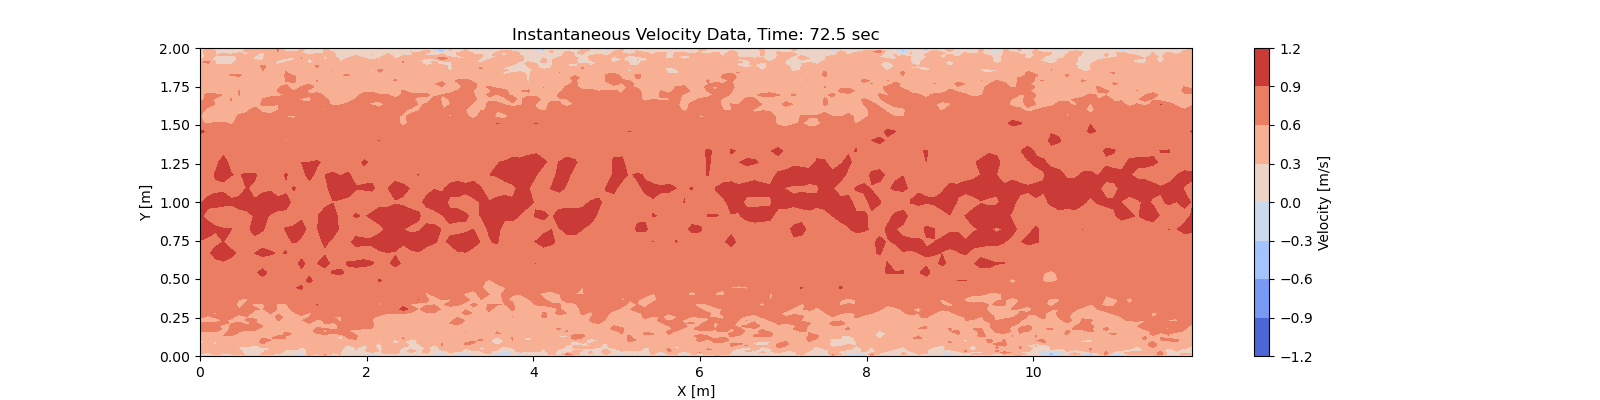

In [175]:
t = -1

fig = plt.figure(figsize=(16,4))
plt.contourf(X.T,Y.T,ds.ux[:,:,30,t], cmap='coolwarm')
plt.colorbar(label='Velocity [m/s]')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title(f'Instantaneous Velocity Data, Time: {ds.t[t].values} sec')

Text(0.5, 1.0, 'Time Averaged Velocity Data')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
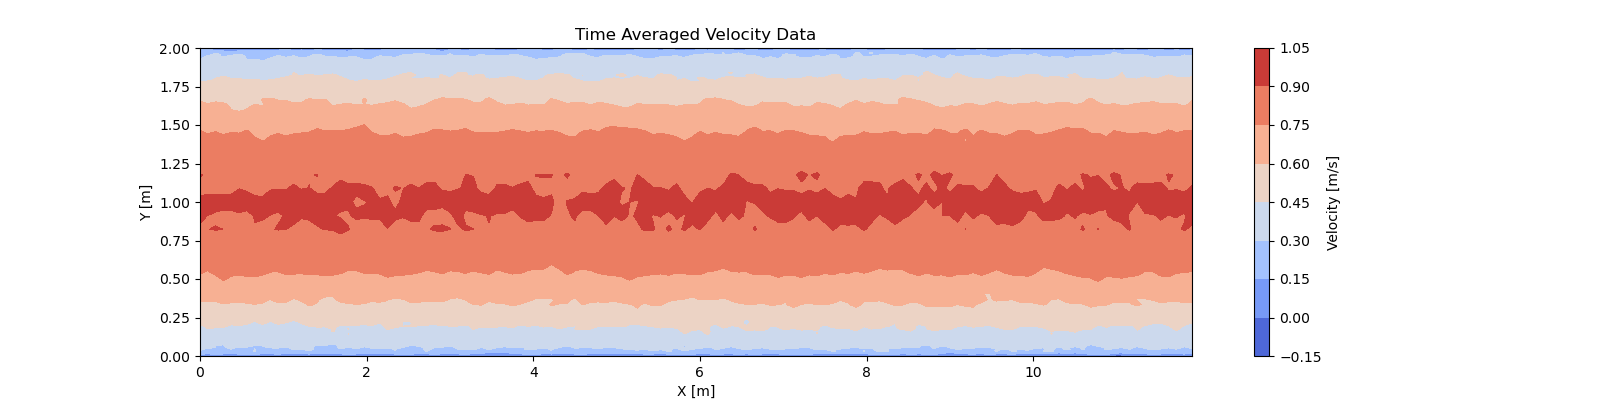

In [176]:
fig = plt.figure(figsize=(16,4))
plt.contourf(X.T,Y.T,time_averaged.ux[:,:,30], cmap='coolwarm')
plt.colorbar(label='Velocity [m/s]')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Time Averaged Velocity Data')

In [88]:
vort = ds.uy.x3d.first_derivative("x") - ds.ux.x3d.first_derivative("y")

In [177]:
n = 35
x = time_averaged.ux[32,0:n,32]
y = Y[0:n,32]

In [178]:
def model_fit(x, a, b, c):
	return a*(x-b)**10 + c

In [179]:
from scipy.optimize import curve_fit

popt, _ = curve_fit(model_fit, x, y, p0=[0.5,0,0])
a_opt, b_opt, c_opt = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a_opt, b_opt, c_opt))

y = 0.00001 * x + -2.34246 * x^2 + -0.04956


In [180]:
# calculate the output for the range
x_fit = np.linspace(min(x), max(x), 100)
y_fit = model_fit(x_fit, a_opt, b_opt, c_opt)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
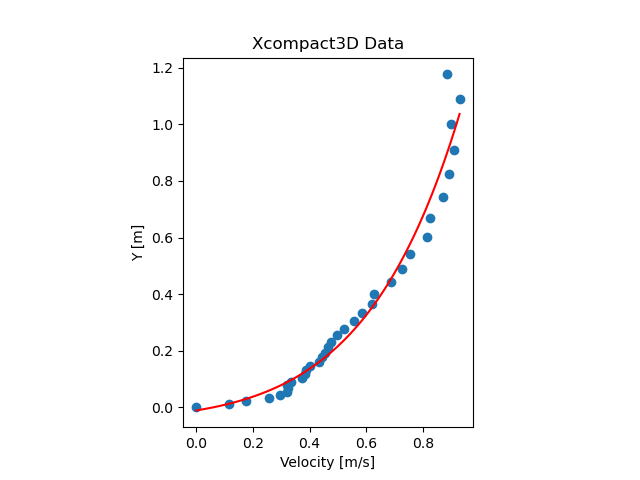

In [181]:
fig = plt.figure()
plt.scatter(time_averaged.ux[32,0:n,32], Y[0:n,32])
plt.plot(x_fit, y_fit, color='r') 
# plt.ylim([0, 1.2])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Y [m]')
plt.title('Xcompact3D Data')
plt.gca().set_aspect('equal', adjustable='box')